In [63]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats import f
import matplotlib.pyplot as plt
%matplotlib inline

# Bug @  ~\AppData\Roaming\Python\Python39\site-packages\xlrd\xlsx.py:L60
data = pd.read_excel('data.xlsx')

def hypothesis_test(p_value, alpha=.01):
    return (f'p_value = {p_value:.4e}' +
          (f' < {alpha} (Reject H0)' if p_value < alpha else
          f' > {alpha} (Accept H0)'))

p_value = 4.8348e-06 < 0.01 (Reject H0)


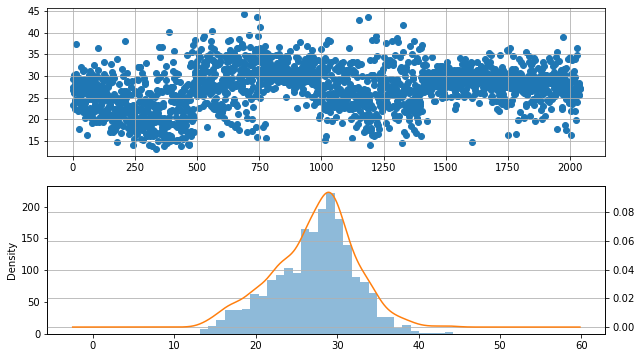

In [64]:
# Q3-(a)
_, p_value = normaltest(data['平均年龄'])
print(hypothesis_test(p_value))

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(data['平均年龄'].index, data['平均年龄'].values)
plt.grid()
ax2 = fig.add_subplot(2, 1, 2)
data['平均年龄'].hist(bins=30, alpha=0.5, ax=ax2)
data['平均年龄'].plot(kind='kde', secondary_y=True, ax=ax2)
plt.grid()
plt.show()

In [65]:
# Q3-(b)
components = [[i, g['平均年龄']] for i, g in data[['群类别', '平均年龄']].groupby('群类别')]
# Test the normality
print('Normal Test:')
for gid, group in components:
    print(f'group {gid}: ' +
          f'{hypothesis_test(normaltest(group)[1])}')
    
# Test the homogeneity of variances
print('Homogeneity Test:')
stds = [[gid, group.std()] for gid, group in components]
print('\n'.join([f'group {i}: std = {v:.5f}' for i, v in stds]))
max_std, min_std = max(stds, key=lambda x: x[1])[1], min(stds, key=lambda x: x[1])[1]
ratio = max_std / min_std
print('Ratio of largest to smallest group std:\n' +
      f'{max_std:.5f} / {min_std:.5f} = {ratio:.5f} ' +
      ('> 2:1 (Reject Homogeneity)' if ratio >= 2 else
       '< 2:1 (Accept Homogeneity)'))

Normal Test:
group 1: p_value = 1.8686e-02 > 0.01 (Accept H0)
group 2: p_value = 6.3506e-02 > 0.01 (Accept H0)
group 3: p_value = 2.2356e-01 > 0.01 (Accept H0)
group 4: p_value = 5.3107e-04 < 0.01 (Reject H0)
group 5: p_value = 2.2267e-20 < 0.01 (Reject H0)
Homogeneity Test:
group 1: std = 4.92376
group 2: std = 5.21737
group 3: std = 2.55290
group 4: std = 5.09826
group 5: std = 3.01898
Ratio of largest to smallest group std:
5.21737 / 2.55290 = 2.04370 > 2:1 (Reject Homogeneity)


In [69]:
# Q3-(c)
# Within-group statistic
means, ns, vares = list(map(lambda x: np.array(x),
                            zip(*[[g.mean(), len(g), g.var()] for _, g in components])))
grand_mean = sum(means * ns) / sum(ns)
# Between-group Variation
ssb = sum(ns * (means - grand_mean) ** 2)
# Within-group Variation
ssw = sum(ns * vares)
# Between-group degree of freedom
dfb = len(ns) - 1
# Within-group degree of freedom
dfw = sum(ns) - len(ns)
# Mean of Squares
msb = ssb / dfb
msw = ssw / dfw
# F Statistic
f_stat = msb / msw
p_value = f.pdf(f_stat, dfb, dfw)

# Visualization
df = pd.DataFrame({
    'Source': ['Between', 'Within', 'Total'],
    'SS': [ssb, ssw, ssb + ssw],
    'df': [dfb, dfw, dfb + dfw],
    'MS': [msb, msw, ''],
    'F': [f_stat, '', ''],
    'P': [p_value, '', '']
})
df

,Source,SS,df,MS,F,P
0,Between,12782.918190,4,3195.73,171.087,3.02173e-126
1,Within,38011.705928,2035,18.679,,
2,Total,50794.624118,2039,,,


Column: 平均年龄
Normal Test:
group 1: p_value = 1.8686e-02 > 0.01 (Accept H0)
group 2: p_value = 6.3506e-02 > 0.01 (Accept H0)
group 3: p_value = 2.2356e-01 > 0.01 (Accept H0)
group 4: p_value = 5.3107e-04 < 0.01 (Reject H0)
group 5: p_value = 2.2267e-20 < 0.01 (Reject H0)
Homogeneity Test:
Ratio of largest to smallest group std:
5.21737 / 2.55290 = 2.04370 > 2:1 (Reject Homogeneity)
Column: 年龄差
Normal Test:
group 1: p_value = 8.0359e-14 < 0.01 (Reject H0)
group 2: p_value = 9.8435e-01 > 0.01 (Accept H0)
group 3: p_value = 2.5022e-05 < 0.01 (Reject H0)
group 4: p_value = 4.1518e-19 < 0.01 (Reject H0)
group 5: p_value = 2.5103e-07 < 0.01 (Reject H0)
Homogeneity Test:
Ratio of largest to smallest group std:
2.59021 / 1.63019 = 1.58890 < 2:1 (Accept Homogeneity)
Column: 消息数
Normal Test:
group 1: p_value = 3.0680e-172 < 0.01 (Reject H0)
group 2: p_value = 2.2304e-78 < 0.01 (Reject H0)
group 3: p_value = 4.9374e-54 < 0.01 (Reject H0)
group 4: p_value = 1.1643e-151 < 0.01 (Reject H0)
group 5: p

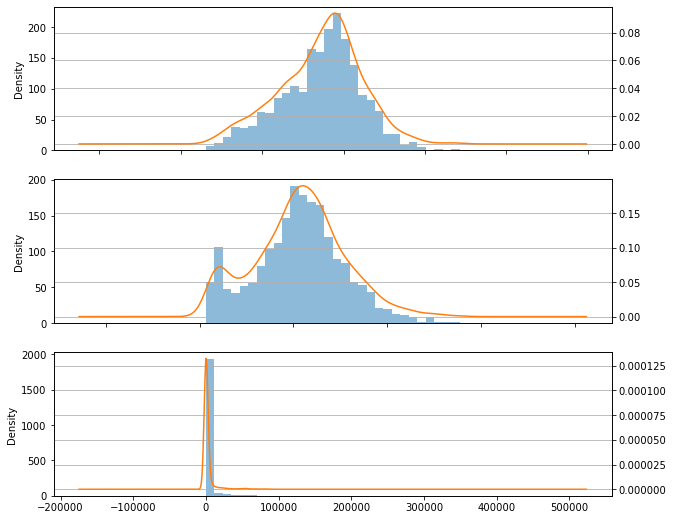

In [88]:
# Q4
cols = ['平均年龄', '年龄差', '消息数']

fig = plt.figure(figsize=(10, 3 * len(cols)))
for idx_col, col in enumerate(cols):
    print(f'Column: {col}')
    ax2 = fig.add_subplot(len(cols), 1, idx_col + 1)
    data[col].hist(bins=30, alpha=0.5, ax=ax2)
    data[col].plot(kind='kde', secondary_y=True, ax=ax2)
    plt.grid()
    components = [[i, g[col]] for i, g in data[['群类别', col]].groupby('群类别')]
    # Test the normality
    print('Normal Test:')
    for gid, group in components:
        norm_test_res = hypothesis_test(normaltest(group)[1])
        print(f'group {gid}: {norm_test_res}')

    # Test the homogeneity of variances
    print('Homogeneity Test:')
    stds = [[gid, group.std()] for gid, group in components]
    max_std, min_std = max(stds, key=lambda x: x[1])[1], min(stds, key=lambda x: x[1])[1]
    ratio = max_std / min_std
    print('Ratio of largest to smallest group std:\n' +
          f'{max_std:.5f} / {min_std:.5f} = {ratio:.5f} ' +
          ('> 2:1 (Reject Homogeneity)' if ratio >= 2 else
           '< 2:1 (Accept Homogeneity)'))

plt.show()

Column: 平均年龄
Normal Test:
group 1: p_value = 1.4836e-02 > 0.01 (Accept H0)
group 2: p_value = 1.6657e-08 < 0.01 (Reject H0)
group 3: p_value = 1.4942e-03 < 0.01 (Reject H0)
group 4: p_value = 2.4790e-01 > 0.01 (Accept H0)
group 5: p_value = 2.5088e-48 < 0.01 (Reject H0)
Homogeneity Test:
Ratio of largest to smallest group std:
0.21369 / 0.08425 = 2.53627 > 2:1 (Reject Homogeneity)
Column: 年龄差
Normal Test:
group 1: p_value = 3.4484e-24 < 0.01 (Reject H0)
group 2: p_value = 5.1473e-31 < 0.01 (Reject H0)
group 3: p_value = 4.2967e-01 > 0.01 (Accept H0)
group 4: p_value = 1.6691e-30 < 0.01 (Reject H0)
group 5: p_value = 6.1312e-83 < 0.01 (Reject H0)
Homogeneity Test:
Ratio of largest to smallest group std:
0.84474 / 0.28195 = 2.99607 > 2:1 (Reject Homogeneity)
Column: 消息数
Normal Test:
group 1: p_value = 4.7073e-13 < 0.01 (Reject H0)
group 2: p_value = 1.2898e-03 < 0.01 (Reject H0)
group 3: p_value = 2.4130e-01 > 0.01 (Accept H0)
group 4: p_value = 6.7512e-03 < 0.01 (Reject H0)
group 5: p_v

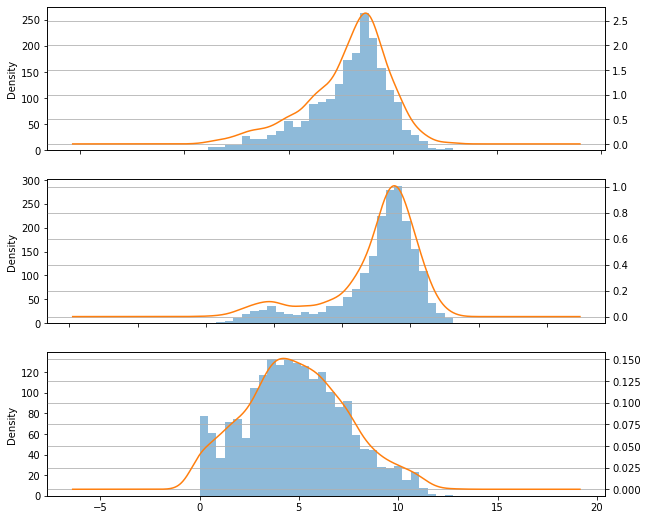

In [87]:
# Q4-log
cols = ['平均年龄', '年龄差', '消息数']

fig = plt.figure(figsize=(10, 3 * len(cols)))
for idx_col, col in enumerate(cols):
    print(f'Column: {col}')
    ax2 = fig.add_subplot(len(cols), 1, idx_col + 1)
    data[col].transform(lambda x: np.log(x)).hist(bins=30, alpha=0.5, ax=ax2)
    data[col].transform(lambda x: np.log(x)).plot(kind='kde', secondary_y=True, ax=ax2)
    plt.grid()
    components = [[i, g[col].transform(
        lambda x: np.log(x))] for i, g in data[['群类别', col]].groupby('群类别')]
    # Test the normality
    print('Normal Test:')
    for gid, group in components:
        norm_test_res = hypothesis_test(normaltest(group)[1])
        print(f'group {gid}: {norm_test_res}')

    # Test the homogeneity of variances
    print('Homogeneity Test:')
    stds = [[gid, group.std()] for gid, group in components]
    max_std, min_std = max(stds, key=lambda x: x[1])[1], min(stds, key=lambda x: x[1])[1]
    ratio = max_std / min_std
    print('Ratio of largest to smallest group std:\n' +
          f'{max_std:.5f} / {min_std:.5f} = {ratio:.5f} ' +
          ('> 2:1 (Reject Homogeneity)' if ratio >= 2 else
           '< 2:1 (Accept Homogeneity)'))

plt.show()